<a href="https://colab.research.google.com/github/sparks-baird/mat_discover/blob/main/mat_discover_testpypi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing PyPI `mat_discover` with GPU

Binder does not support GPU computing, so the calculations will run somewhat slower (on the CPU). If you'd like to run a version of this notebook interactively with GPU, please see the "Open in Colab" link at the top-left of this page. Alternatively, you can set the "dummy" flag to True to run on a subset of data.

In [ ]:
dummy = False

In [ ]:
import torch
torch.__version__ # check for troubleshooting

'1.9.0+cu111'

In [ ]:
from mat_discover.mat_discover_ import Discover

In [ ]:
disc = Discover()

## Train Discover

In [ ]:
from mat_discover.CrabNet.data.materials_data import elasticity
from mat_discover.mat_discover_ import groupby_formula
train_df, val_df = disc.data(elasticity, dummy=dummy)

In [ ]:
disc.fit(train_df)


Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cuda:0
Model size: 11987206 parameters



Generating EDM: 100%|██████████| 8465/8465 [00:00<00:00, 123370.88formulae/s]


loading data with up to 6 elements in the formula
training with batchsize 512 (2**9.000)
stepping every 170 training passes, cycling lr every 10 epochs
checkin at 20 epochs to match lr scheduler
Epoch: 0/40 --- train mae: 52.3 val mae: 52.3
Epoch: 19/40 --- train mae: 12.6 val mae: 12.6
Epoch: 39/40 --- train mae: 9.64 val mae: 9.64
Saving network (test-property) to models/trained_models/test-property.pth
[train-CrabNet]
Elapsed: 182.11661



/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




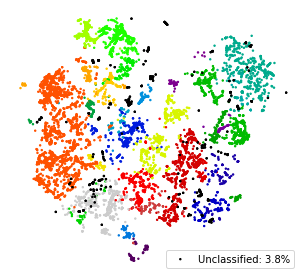

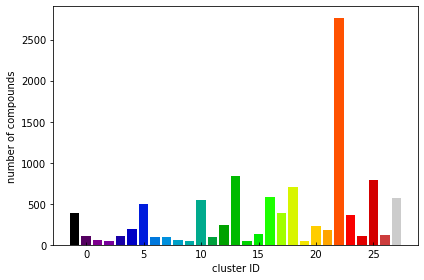

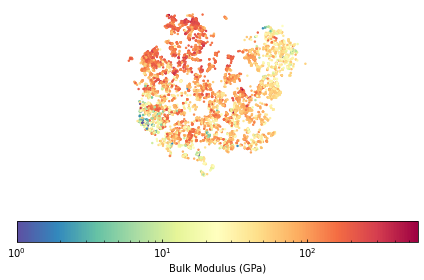

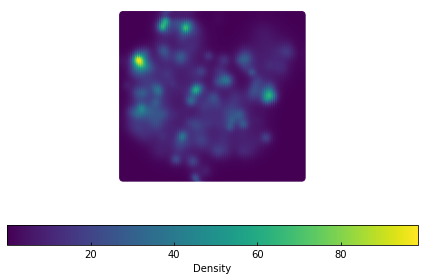

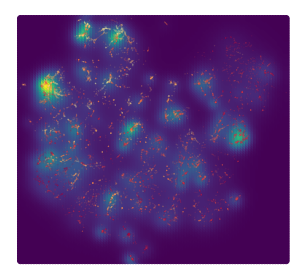

/usr/local/lib/python3.7/dist-packages/mat_discover/mat_discover_.py:900: UserWarning:

Skipping group cross-validation plot



In [ ]:
disc.plot()

In [ ]:
scores = disc.predict(val_df)

Generating EDM: 100%|██████████| 8465/8465 [00:00<00:00, 149430.28formulae/s]


loading data with up to 6 elements in the formula


Generating EDM: 100%|██████████| 2117/2117 [00:00<00:00, 129754.23formulae/s]


loading data with up to 6 elements in the formula
val RMSE:  25.400735697980224
Fitting mod_petti kernel matrix
Constructing distances


/usr/local/lib/python3.7/dist-packages/numba/cuda/decorators.py:110: NumbaDeprecationWarning: Eager compilation of device functions is deprecated (this occurs when a signature is provided)
  warn(NumbaDeprecationWarning(msg))
/usr/local/lib/python3.7/dist-packages/numba/cuda/decorators.py:110: NumbaDeprecationWarning: Eager compilation of device functions is deprecated (this occurs when a signature is provided)
  warn(NumbaDeprecationWarning(msg))
/usr/local/lib/python3.7/dist-packages/numba/cuda/decorators.py:110: NumbaDeprecationWarning: Eager compilation of device functions is deprecated (this occurs when a signature is provided)
  warn(NumbaDeprecationWarning(msg))
/usr/local/lib/python3.7/dist-packages/numba/cuda/decorators.py:110: NumbaDeprecationWarning: Eager compilation of device functions is deprecated (this occurs when a signature is provided)
  warn(NumbaDeprecationWarning(msg))


[fit-wasserstein]
Elapsed: 29.35964



/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1736: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "


[fit-UMAP]
Elapsed: 94.84939



/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1736: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "


[fit-vis-UMAP]
Elapsed: 45.27679

[HDBSCAN*]
Elapsed: 0.18433

[pdf-summation]
Elapsed: 15.11566

[train-val-pdf-summation]
Elapsed: 4.16821



In [ ]:
disc.dens_score_df.head(10)

,formula,prediction,density,Density Score
7023,ReB2,340.569519,10.935854,2.905369
379,B2W,328.168732,10.942292,2.783947
9314,UB2Os3,290.820557,5.642598,2.650222
8315,TaMoN,293.460114,7.597035,2.590773
5431,MoN,331.050354,16.114165,2.586547
373,B2Mo,306.965637,10.894447,2.578903
8316,TaN,325.076263,16.171267,2.525696
1606,Co(BW)2,323.249695,15.850545,2.521840
398,BOs,329.538971,18.021595,2.488597
376,B2Ru,294.123474,10.928230,2.451976


In [ ]:
disc.peak_score_df.head(10)

,formula,prediction,density,Peak Score
9575,WO2,288.414124,26.823560,5.669866
9359,UO3,157.152588,11.193075,5.140387
6224,NiH,186.806213,22.910344,4.934176
9420,V2O3,218.957001,11.672915,4.319363
10545,ZrSiO,195.960449,10.002297,4.296315
6336,PaB3,190.196991,13.102100,4.237248
4847,Mg(MoO2)2,155.656754,15.048138,3.884718
5340,MnIr,252.838013,77.922555,3.862711
7523,SiIr3,300.873047,44.895201,3.795281
5277,MnB4,253.122528,28.390325,3.775811


You can see what other built-in data is available via:

In [ ]:
from pkgutil import iter_modules # https://stackoverflow.com/a/58684066/13697228
from mat_discover.CrabNet import data

import sys
from setuptools import find_packages
from pkgutil import iter_modules

def find_modules(path):
    """Find modules recursively. https://stackoverflow.com/a/54323162/13697228"""
    modules = set()
    for pkg in find_packages(path):
        modules.add(pkg)
        pkgpath = path + '/' + pkg.replace('.', '/')
        if sys.version_info.major == 2 or (sys.version_info.major == 3 and sys.version_info.minor < 6):
            for _, name, ispkg in iter_modules([pkgpath]):
                if not ispkg:
                    modules.add(pkg + '.' + name)
        else:
            for info in iter_modules([pkgpath]):
                if not info.ispkg:
                    modules.add(pkg + '.' + info.name)
    return modules

find_modules(data.__path__[0])

{'benchmark_data',
 'benchmark_data.CritExam__Ed',
 'benchmark_data.CritExam__Ef',
 'benchmark_data.OQMD_Bandgap',
 'benchmark_data.OQMD_Energy_per_atom',
 'benchmark_data.OQMD_Formation_Enthalpy',
 'benchmark_data.OQMD_Volume_per_atom',
 'benchmark_data.aflow__Egap',
 'benchmark_data.aflow__ael_bulk_modulus_vrh',
 'benchmark_data.aflow__ael_debye_temperature',
 'benchmark_data.aflow__ael_shear_modulus_vrh',
 'benchmark_data.aflow__agl_thermal_conductivity_300K',
 'benchmark_data.aflow__agl_thermal_expansion_300K',
 'benchmark_data.aflow__energy_atom',
 'benchmark_data.mp_bulk_modulus',
 'benchmark_data.mp_e_hull',
 'benchmark_data.mp_elastic_anisotropy',
 'benchmark_data.mp_mu_b',
 'benchmark_data.mp_shear_modulus',
 'element_properties',
 'matbench',
 'materials_data',
 'materials_data.elasticity',
 'materials_data.example_materials_property'}